## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
output_dir = "outputs/figures"

In [3]:
df = pd.read_csv("../data/raw/Raw-Telco-Customer-Churn.csv")
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,0280-XJGEX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4190-MFLUW,4183-MYFRB
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No
tenure,1,34,2,45,2,8,22,10,28,62,13,16,58,49,25,69,52,71,10,21
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,No,Fiber optic,Fiber optic,Fiber optic,Fiber optic,No,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No internet service,No,No,Yes,Yes,No internet service,Yes,No,No


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
col = df.drop(columns=["customerID","TotalCharges","MonthlyCharges"]).columns
for i in col:
    print(f"{i} : {df[i].unique()}")
    print(f"Total Number of Unique Values of {i} : {df[i].nunique()}")
    # print(df.value_counts(i))
    print("-"*80)
    print("\n")

gender : <StringArray>
['Female', 'Male']
Length: 2, dtype: str
Total Number of Unique Values of gender : 2
--------------------------------------------------------------------------------


SeniorCitizen : [0 1]
Total Number of Unique Values of SeniorCitizen : 2
--------------------------------------------------------------------------------


Partner : <StringArray>
['Yes', 'No']
Length: 2, dtype: str
Total Number of Unique Values of Partner : 2
--------------------------------------------------------------------------------


Dependents : <StringArray>
['No', 'Yes']
Length: 2, dtype: str
Total Number of Unique Values of Dependents : 2
--------------------------------------------------------------------------------


tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Total Number of Unique Values of tenur

### Charts

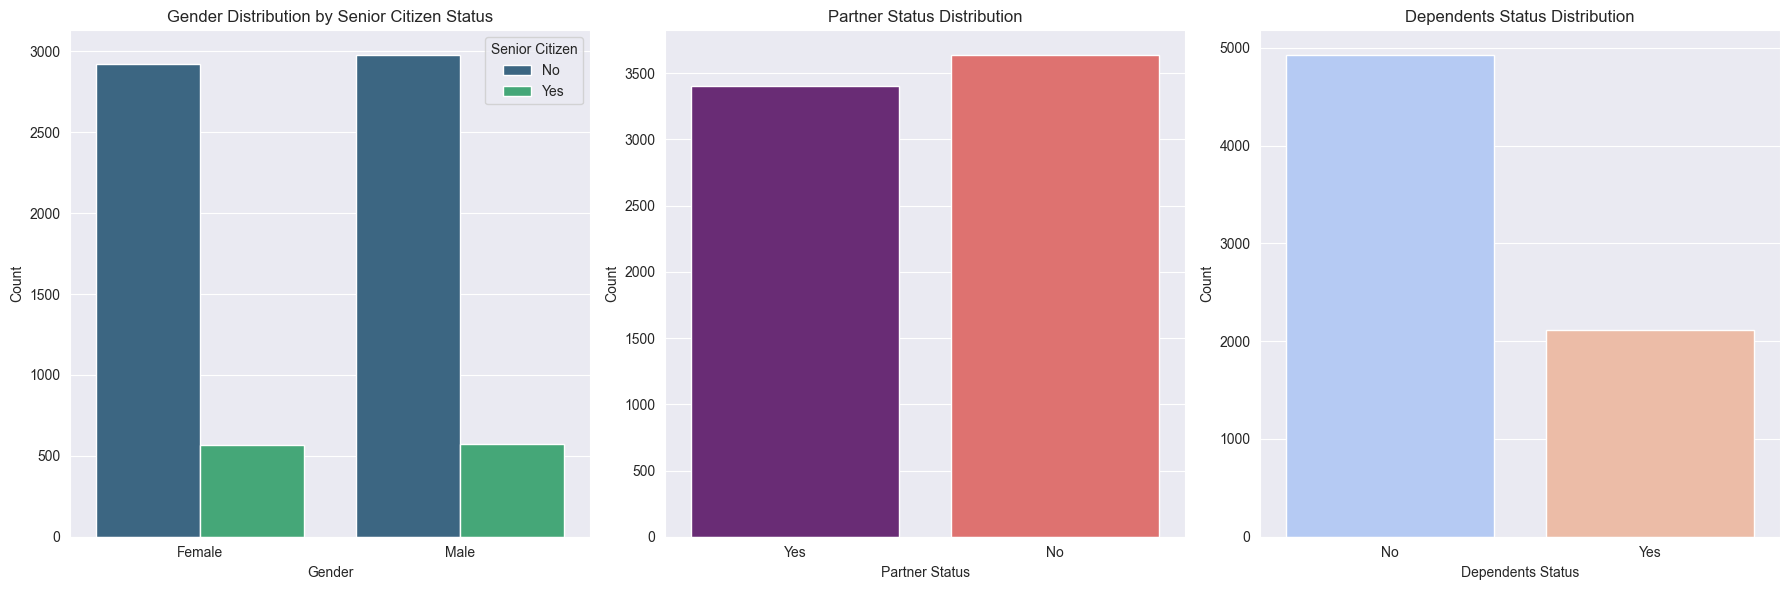

In [10]:
# Set the visual Style
sns.set_style("darkgrid")

# Figure with subplots
fig, axes = plt.subplots(1,3, figsize=(18,6))

# Gender and SeniorCitizen
sns.countplot(data=df, x='gender', hue='SeniorCitizen', ax=axes[0],palette='viridis')
axes[0].set_title("Gender Distribution by Senior Citizen Status")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].legend(title='Senior Citizen', labels=['No', 'Yes'])

# Partner Status
sns.countplot(data=df,x='Partner', ax=axes[1], palette='magma')
axes[1].set_title("Partner Status Distribution")
axes[1].set_xlabel("Partner Status")
axes[1].set_ylabel("Count")

# Dependents Status
sns.countplot(data=df,x='Dependents', ax=axes[2], palette='coolwarm')
axes[2].set_title("Dependents Status Distribution")
axes[2].set_xlabel("Dependents Status")
axes[2].set_ylabel("Count")

plt.tight_layout()

# dpi=300 ensures the image is high resolution for a portfolio or presentation
# bbox_inches='tight' prevents the labels from being cut off
output_dir = "D:\\Machine_Learning_Projects\\Customer Churn Analysis\\outputs\\figures"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir,"No_Senior_Citizen_Distribution.png"), dpi=300,bbox_inches='tight')
plt.show()

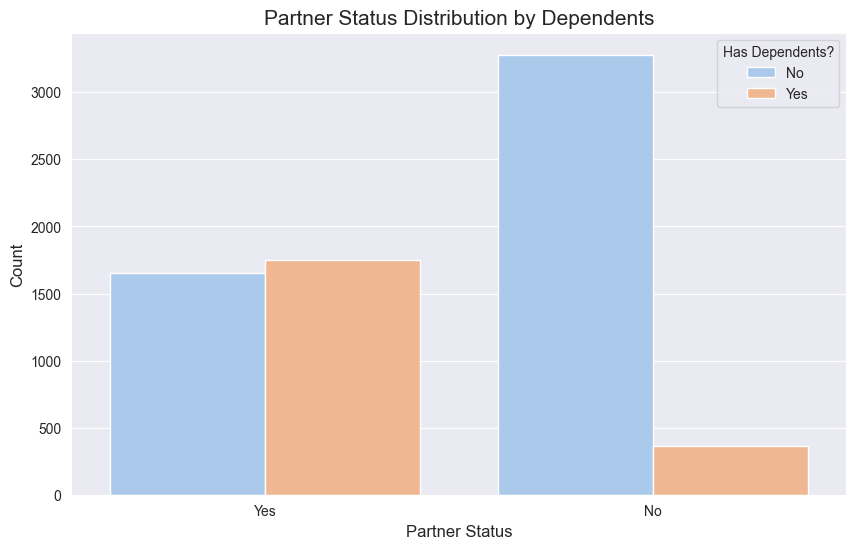

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Partner',hue='Dependents',palette='pastel')
plt.title("Partner Status Distribution by Dependents",fontsize=15)
plt.xlabel("Partner Status",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.legend(title='Has Dependents?')

plt.savefig(os.path.join(output_dir,"Partner_Distribution_by_Dependents.png"), dpi=300,bbox_inches='tight')
plt.show()

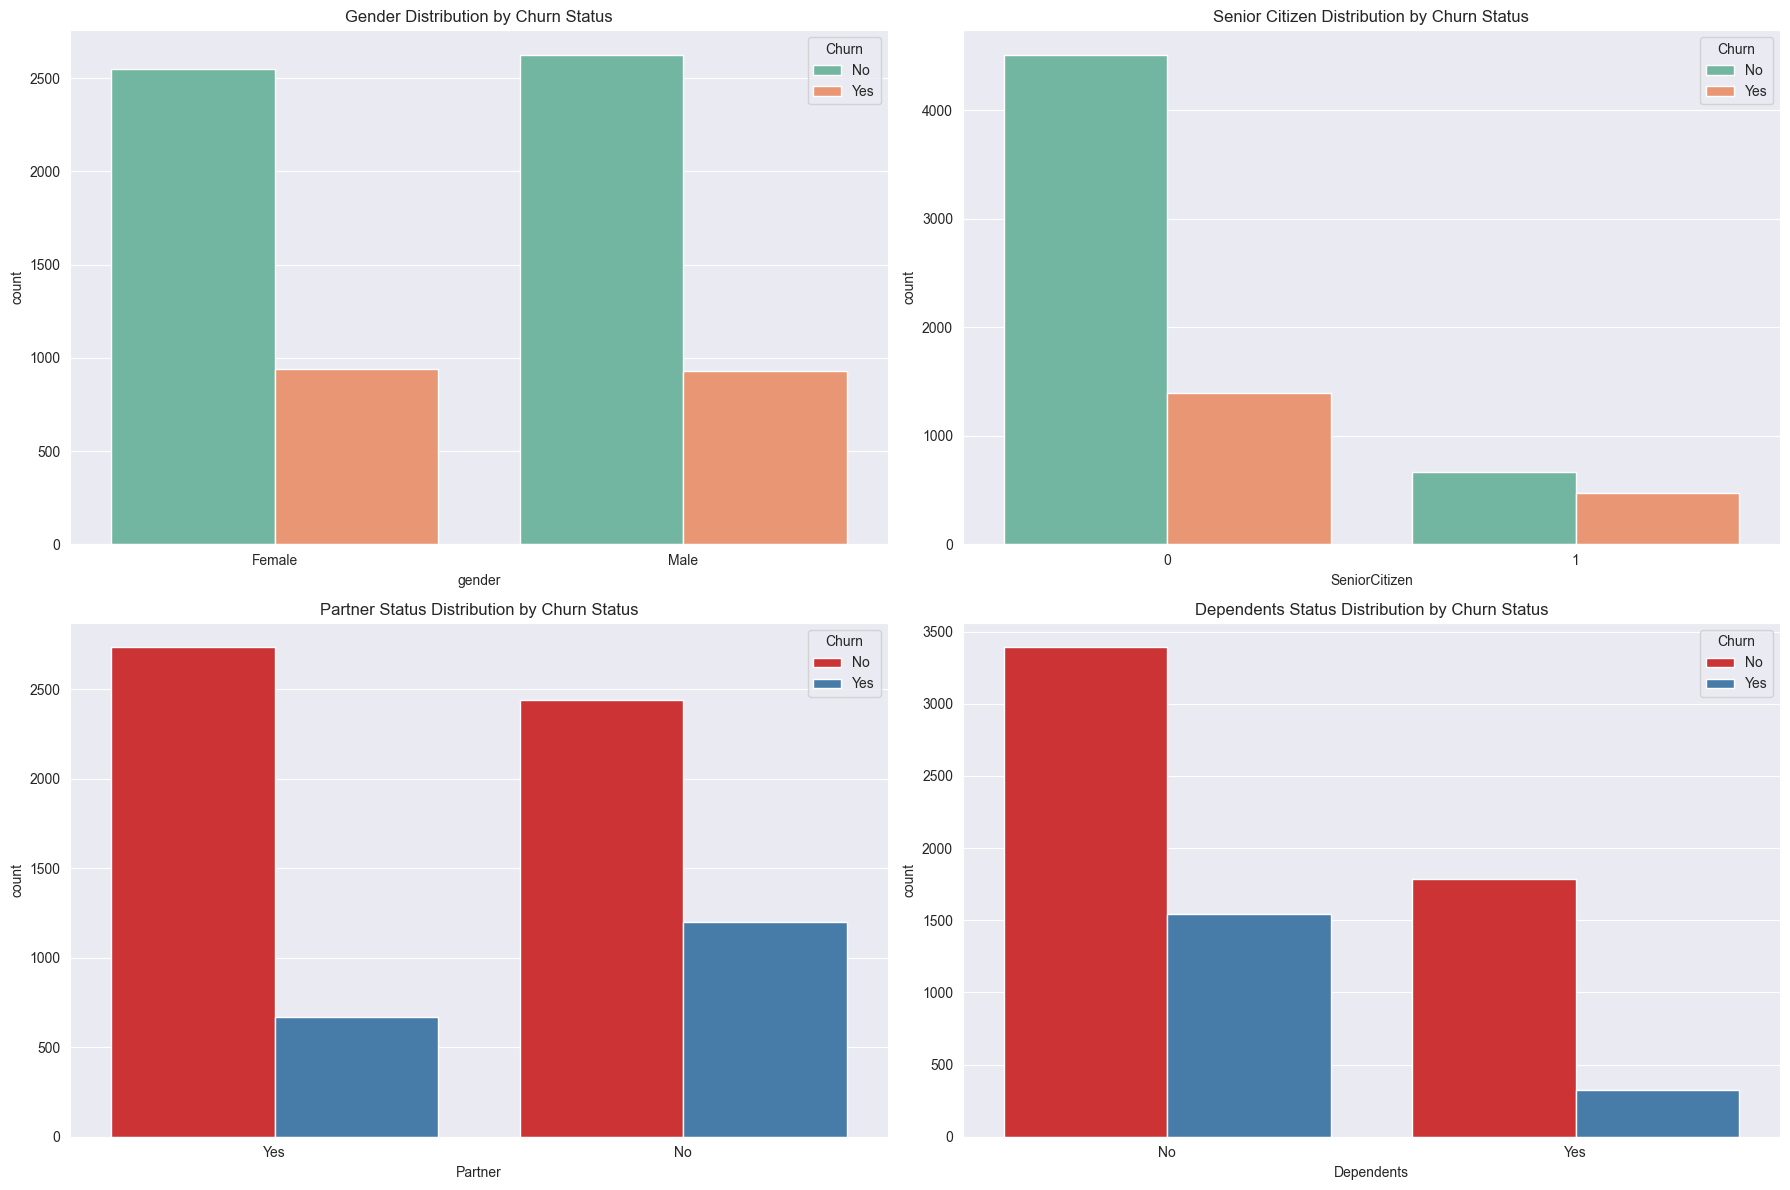

In [12]:
fig, axes = plt.subplots(2,2, figsize=(18,12))
sns.set_style("darkgrid")

# Gender vs Churn
sns.countplot(data=df, x='gender',hue='Churn',ax=axes[0,0],palette='Set2')
axes[0,0].set_title("Gender Distribution by Churn Status")

# Senior Citizen vs Churn
sns.countplot(data=df, x='SeniorCitizen',hue='Churn',ax=axes[0,1],palette='Set2')
axes[0,1].set_title("Senior Citizen Distribution by Churn Status")

# Partner vs Churn
sns.countplot(data=df, x='Partner',hue='Churn',ax=axes[1,0],palette='Set1')
axes[1,0].set_title("Partner Status Distribution by Churn Status")

# Dependents vs Churn
sns.countplot(data=df, x='Dependents',hue='Churn',ax=axes[1,1],palette='Set1')
axes[1,1].set_title("Dependents Status Distribution by Churn Status")

plt.tight_layout()

plt.show()

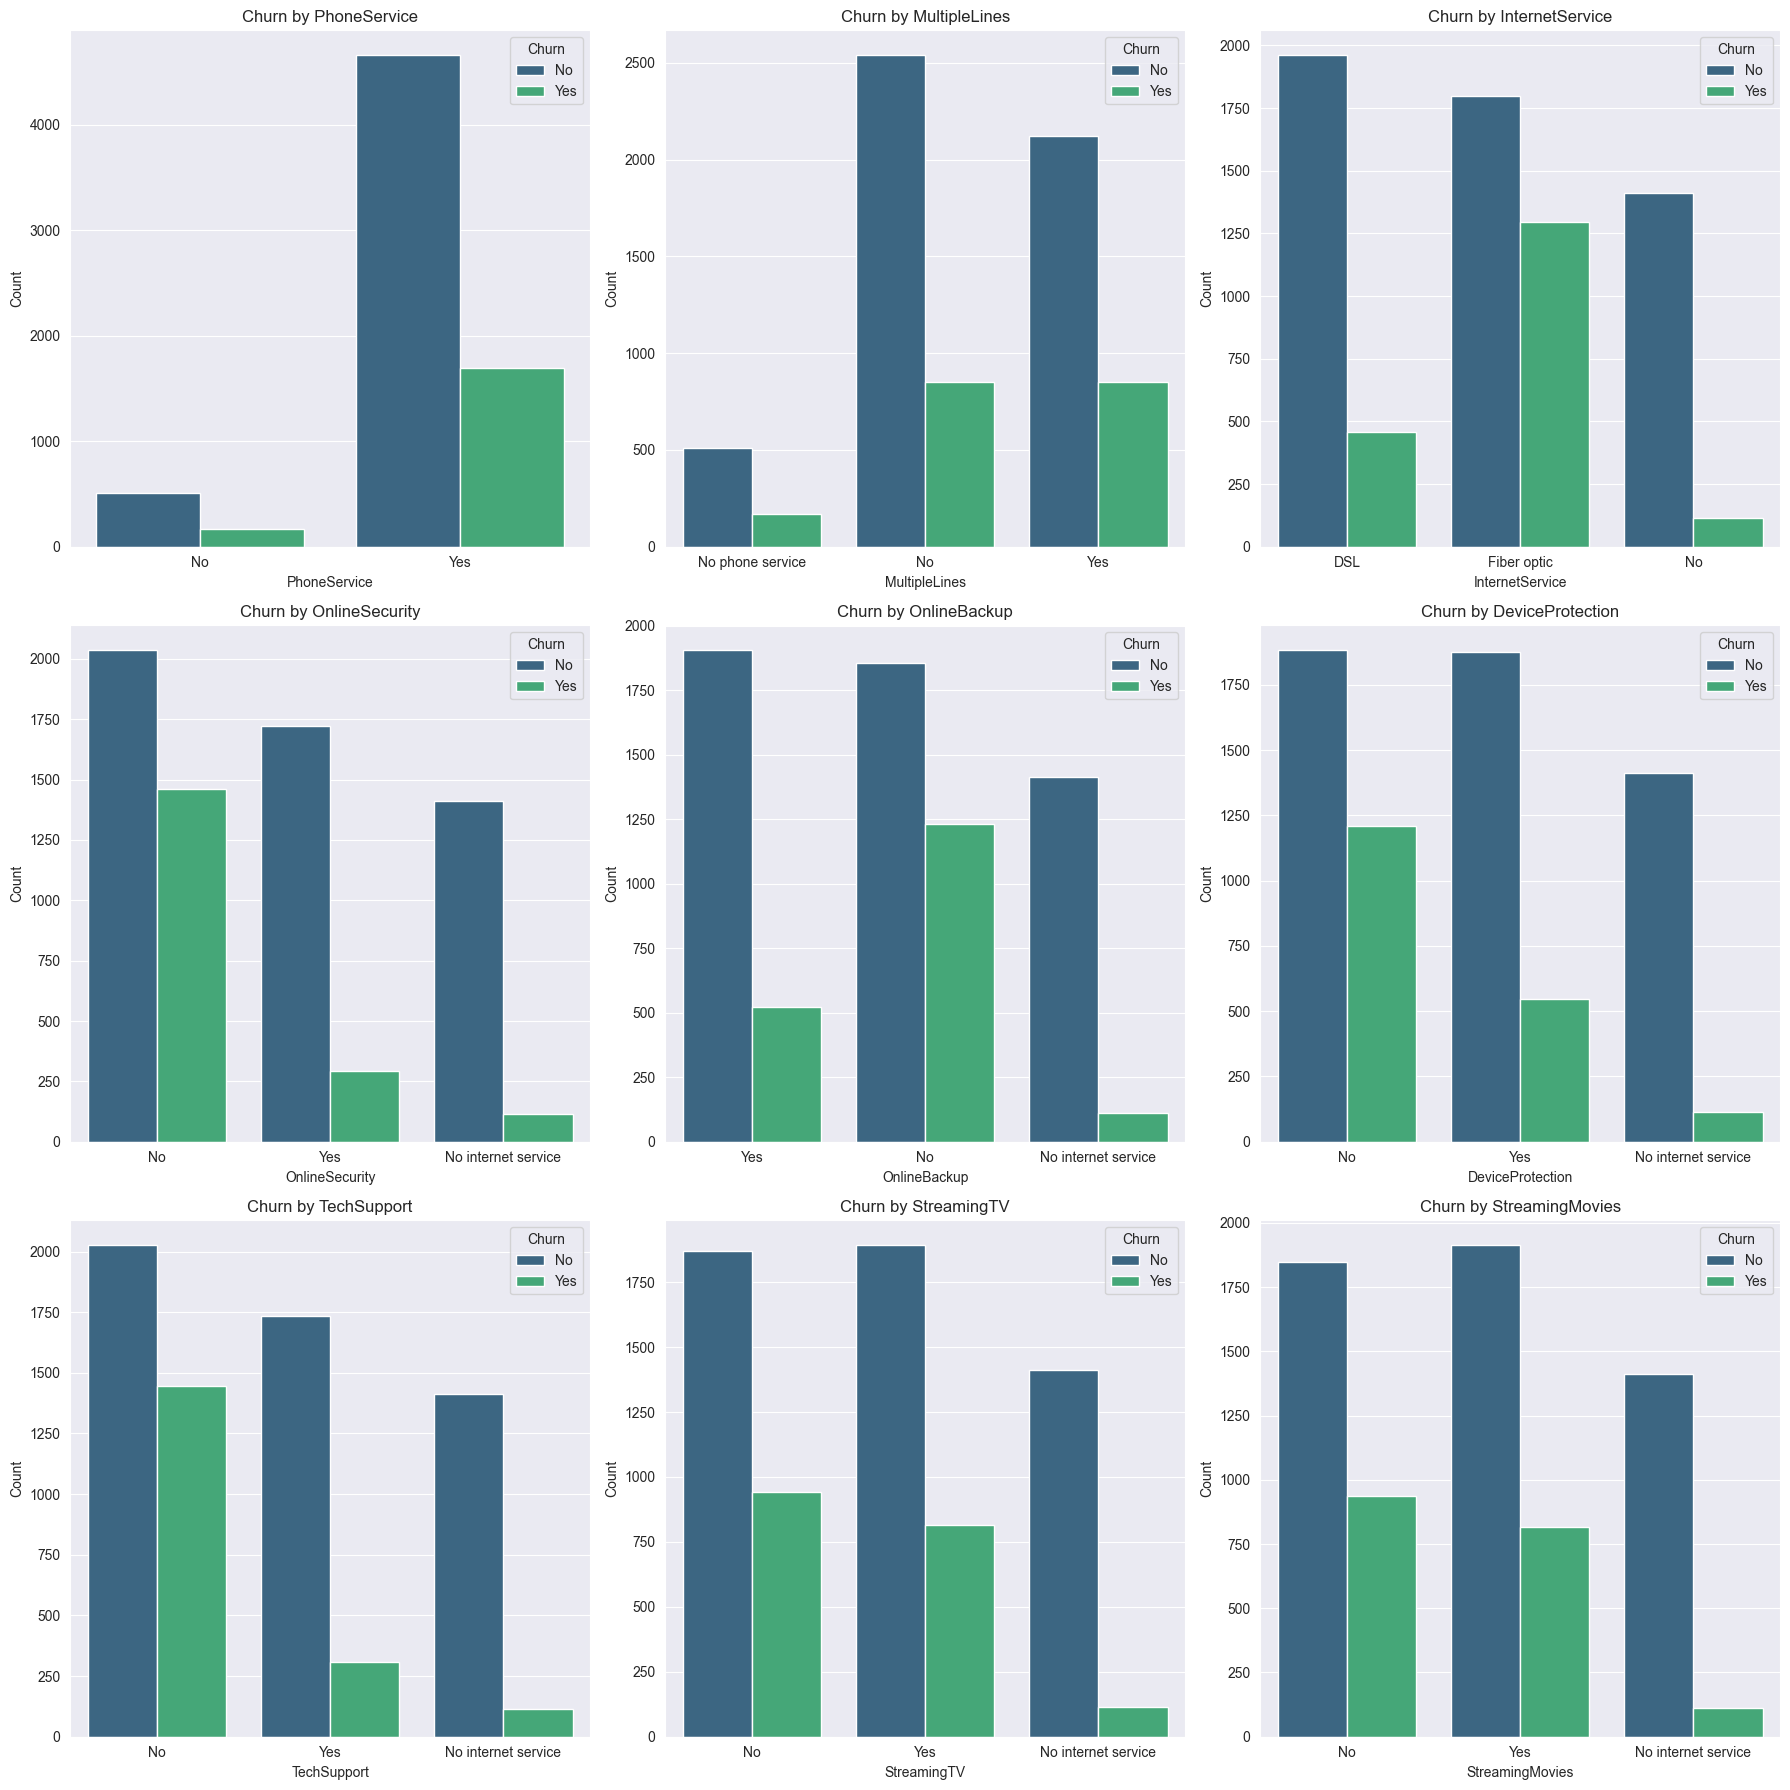

In [ ]:
# List of service columns to analyze
services = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i,service in enumerate(services):
    sns.countplot(data=df, x=service,hue='Churn',ax=axes[i],palette='viridis')
    axes[i].set_title(f"Churn by {service}")
    axes[i].set_xlabel(service)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.savefig(os.path.join(output_dir,"Service_Distribution_by_Churn.png"), dpi=300,bbox_inches='tight')
plt.show()

- MultipleLines are not effective for churn prediction.

- Fiberoptic internet service has higher churn rates compared to DSL and No internet service.

- Online security, backup, device protection, tech support, streaming TV and movies are all associated with lower churn rates, indicating that customers who subscribe to these services are less likely to churn.

- Phone service does not show a significant difference in churn rates, suggesting that it may not be a strong predictor of churn in this dataset.
- No insternet service customers are more loyal than those with internet service. This is evident from the higher proportion of "No Internet Service" customers in the "No Churn" category compared to the "Churn" category. Customers without internet service are less likely to churn, suggesting that they may have fewer reasons to switch providers or may be more satisfied with their current service.

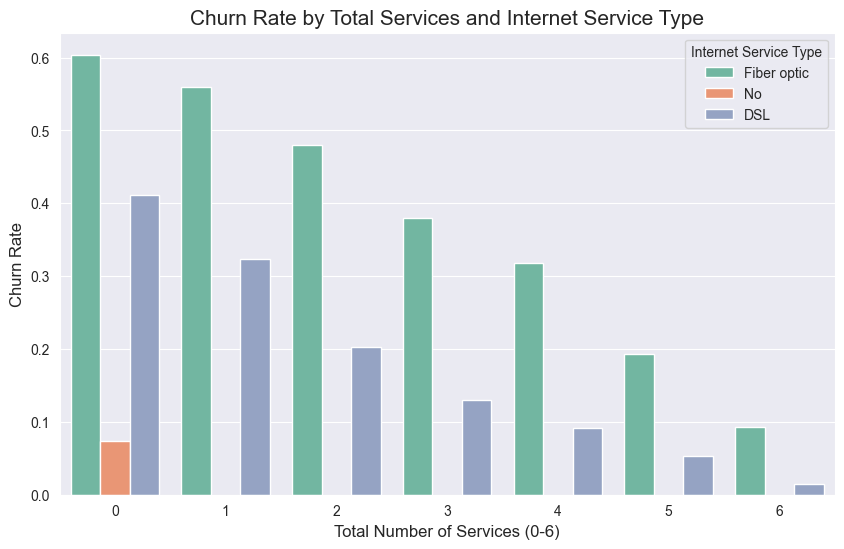

In [25]:
# Create the feature
vas_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']

df['Total_Services'] = (df[vas_columns] == 'Yes').sum(axis=1)
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Total_Services', y='Churn_Numeric', hue='InternetService', ci=None, palette='Set2')
plt.title("Churn Rate by Total Services and Internet Service Type", fontsize=15)
plt.xlabel("Total Number of Services (0-6)", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.legend(title='Internet Service Type')

plt.savefig(os.path.join(output_dir,"Churn_Rate_by_Total_Services.png"), dpi=300,bbox_inches='tight')
plt.show()

In [24]:
# This proves that Fiber users actually buy MORE services, 
# yet they still churn more! This is a huge business insight.
analysis = df.groupby('InternetService').agg({
    'Total_Services': 'mean',
    'Churn_Numeric': 'mean'
})
print(analysis)

                 Total_Services  Churn_Numeric
InternetService                               
DSL                    2.662949       0.189591
Fiber optic            2.553618       0.418928
No                     0.000000       0.074050
